In [1]:
# Add local scripts to module search path
import sys
import os
sys.path.append(os.path.realpath('../toliman-proper'))

# Test of refactored detector image generation


`form_detector_image` takes parameters for multiple sources and combines their PSFs to create a single detector image. 

In [5]:
import numpy as np

toliman_settings = {
                    # Eduardo's values:
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    'm1_m2_sep': 0.54933763033373, 
                    'm2_fl': -0.02337895948640,  
                    'bfl': 0.52761,#0.58999999998985,  
                    'm2_rad': 0.00590401477581,
                    'm1_conic': -1.00011470000000,
                    'm2_conic': -1.16799179177759,
                    # Go for 5-fold symmetry to match assumed rosette
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    'beam_ratio': 0.2,
                    'tilt_x': 0.00,
                    'tilt_y': 0.00
                    }

gridsize = 2048 # sampling of wavefront
detector_pitch = 11.0e-6 # m/pixel on detector
npixels = 512 # Size of detector, in pixels

n_wavelengths = 5
# First source, on axis
source_a = {
            'wavelengths': np.linspace(0.5, 0.6, num=n_wavelengths),
            'weights': [1. / n_wavelengths for i in range(n_wavelengths)],
            'settings': toliman_settings
            }

# Second source, off-axis
tilted = toliman_settings.copy()
tilted['tilt_x'] = 3.00
tilted['tilt_y'] = 1.00

source_b = {
            'settings': tilted,
            'wavelengths': np.linspace(0.5, 0.6, num=n_wavelengths),
            'weights': [2. / n_wavelengths for i in range(n_wavelengths)]
            }


## Single source

Here just use the first source.

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


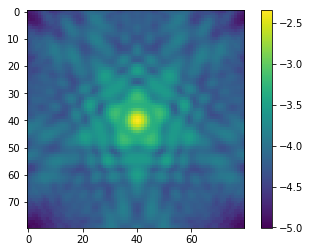

In [3]:
# Combined PSF
%matplotlib inline
from proper_tools import form_detector_image
import matplotlib.pyplot as plt

detector_image = form_detector_image('prescription_rc_conic', [source_a], gridsize, detector_pitch, npixels)

## Full
#plt.imshow(np.log10(detector_image), interpolation = 'none', cmap='viridis')
#plt.colorbar()
#plt.show()
# Zoomed in
plt.imshow(np.log10(detector_image[256-40:256+40, 256-40:256+40]), interpolation = 'none', cmap='viridis')
plt.colorbar()
plt.show()

## Dual sources

This is more representative of Alpha Centauri A-B.

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


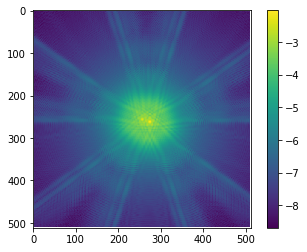

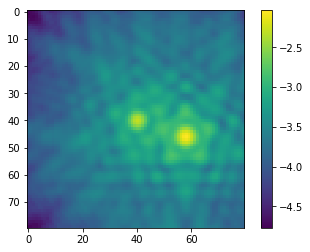

In [6]:
# Combined PSF
%matplotlib inline
from proper_tools import form_detector_image
import matplotlib.pyplot as plt

detector_image = form_detector_image('prescription_rc_conic', [source_a, source_b], gridsize, detector_pitch, npixels)

# Full
plt.imshow(np.log10(detector_image), interpolation = 'none', cmap='viridis')
plt.colorbar()
plt.show()

# Zoomed in
plt.imshow(np.log10(detector_image[256-40:256+40, 256-40:256+40]), interpolation = 'none', cmap='viridis')
plt.colorbar()
plt.show()